In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
customer_df=pd.read_csv('~/Desktop/Ecommerce Customers.csv')
customer_df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customer_df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
sns.set_palette('Oranges')

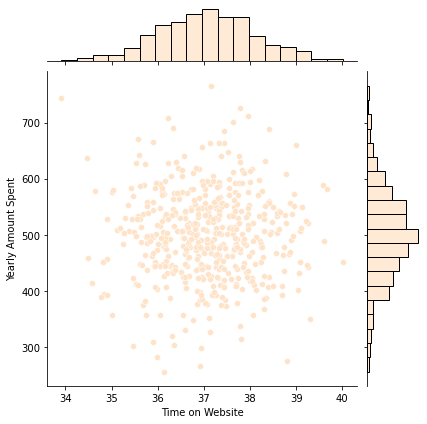

In [13]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customer_df)
plt.show()

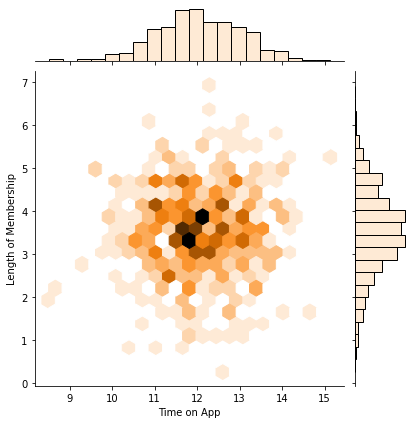

In [14]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customer_df, kind='hex')
plt.show()

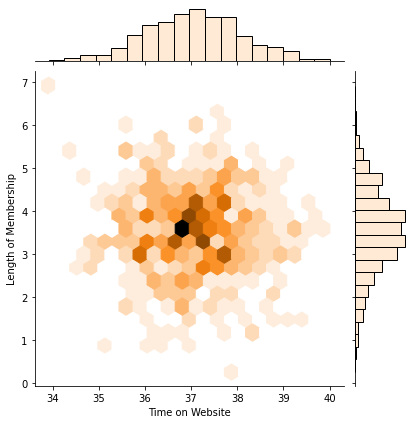

In [15]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=customer_df,kind='hex')
plt.show()

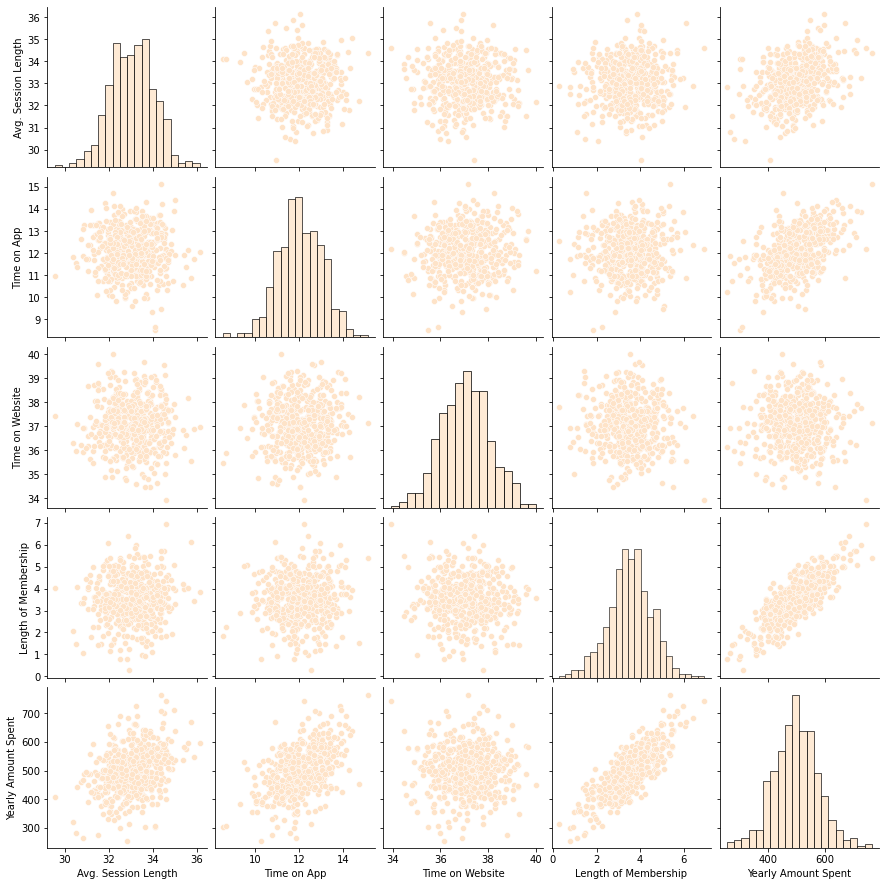

In [19]:
sns.pairplot(customer_df)
plt.show()

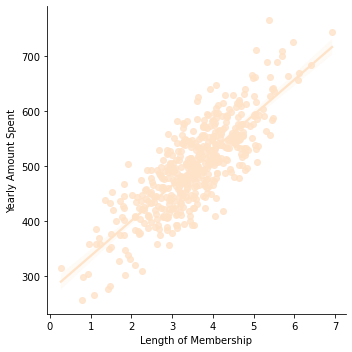

In [20]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customer_df)
plt.show()

In [23]:
y=customer_df['Yearly Amount Spent']
X=customer_df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [26.16524827 38.51492442  0.5955571  61.17410085]


In [29]:
predictions = lm.predict(X_test)

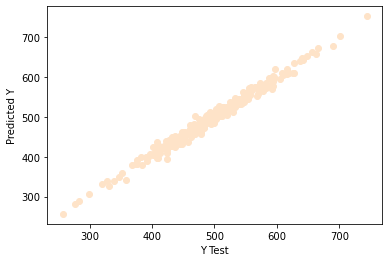

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [32]:
from sklearn import metrics
print('MAE= ', metrics.mean_absolute_error(y_test,predictions))
print('MSE= ', metrics.mean_squared_error(y_test,predictions))
print('RMSE= ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE=  8.11959258533658
MSE=  99.33973006875065
RMSE=  9.96693182823835


/Users/sadhanasharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


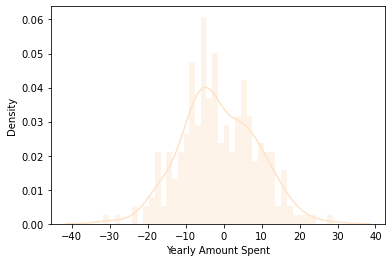

In [37]:
sns.distplot((y_test-predictions),bins=40);

In [38]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,26.165248
Time on App,38.514924
Time on Website,0.595557
Length of Membership,61.174101
